## 6.ニューラルネットワーク

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import keras
import tensorflow as tf

###学習用ディレクトリの作成
./content/trainに学習用データとして使用する画像を格納するディレクトリを作成します。（このコードでは、USA・Italy・Australiaのディレクトリを作成しています。） 


In [ ]:
# Colab内にディレクトリを作成

#ラベルUSAのディレクトリを作成
DIR = "train/usa/"
# DIRの名称のディレクトリがなければ作成
if not os.path.exists(DIR):
    os.makedirs(DIR)

#ラベルItalyのディレクトリを作成
DIR = "train/Italy/"
# DIRの名称のディレクトリがなければ作成
if not os.path.exists(DIR):
    os.makedirs(DIR)

#ラベルAustraliaのディレクトリを作成
DIR = "train/Australia/"
# DIRの名称のディレクトリがなければ作成
if not os.path.exists(DIR):
    os.makedirs(DIR)

### 学習用のデータ作成

ディレクトリが作成されたことを確認後、手動で該当する学習用の画像データをディレクトリにアップロードし、読み込みます。 （このコードでは、学習用データとしてUSA・Italy・Australiaの画像を使用します。）

In [ ]:
# 学習用のデータを作る.
image_list = []
label_list = []


# ./img/train 以下のディレクトリの画像を読み込む。
for dir in os.listdir("/content/train/"):
    
    dataset_path = "/content/train/" + dir 
    label = -1

    # USAはラベル0
    if dir == "USA":
      label = 0
    # Italyはラベル1
    elif dir == "Italy":
      label = 1
    # Australiaはラベル2
    elif dir == "Australia":
      label = 2
    

    for file in os.listdir(dataset_path):
      # 配列label_listに正解ラベルを追加(USA:0 Italy:1 Australia:2)
      label_list.append(label)
      filepath = dataset_path + "/" + file
      print(filepath)
      image = Image.open(filepath)
      image = image.resize((500, 500), Image.BICUBIC)
      image = np.asarray(image)
      image_list.append(image / 255.)

# kerasに渡すためにnumpy配列に変換。
train_data = np.array(image_list)

train_label = np.array(label_list)

/content/img/train/USA/アメリカ-トーマス・ジェファーソン記念館.jpg
/content/img/train/USA/アメリカ-ホースシューベンド.jpg
/content/img/train/USA/アメリカー自由の女神.jpg
/content/img/train/USA/USA-自由の女神.png
/content/img/train/USA/アメリカ-ホースシューベンド (1).jpg
/content/img/train/USA/アメリカーヨセミテ国立公園.jpg
/content/img/train/Italy/イタリアーアルベロベッロのトゥルッリ .jpg
/content/img/train/Italy/イタリアーバチカン市国.jpg
/content/img/train/Italy/イタリアーヴェネツィア (1).jpg
/content/img/train/Italy/イタリアーピサのドゥオモ広場.jpg
/content/img/train/Italy/イタリアーカテドラーレ大聖堂.jpg
/content/img/train/Italy/イタリアーポンペイ.jpg
/content/img/train/Italy/イタリアーフィレンツェ歴史地区.jpg
/content/img/train/Italy/イタリアードロミテ.jpg
/content/img/train/Italy/イタリアーピサのドゥオモ広場 (1).jpg
/content/img/train/Italy/イタリアートレビの泉.jpg
/content/img/train/Italy/イタリアーコロッセオ.jpg
/content/img/train/Italy/イタリアーアマルフィ海岸.jpg
/content/img/train/Italy/イタリアーヴェネツィア.jpg
/content/img/train/Italy/イタリアートリノスペルガ聖堂.jpg
/content/img/train/Italy/イタリアーパンテオン神殿.jpg
/content/img/train/Italy/イタリアーマテーラ.jpg
/content/img/train/Italy/イタリアードロミーティ.jpg
/content/img/train/Italy/

画像の1つを確認のために表示します。

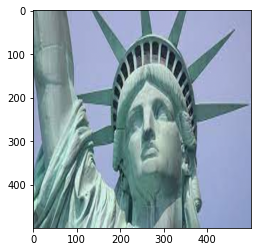

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(train_data[3])

In [ ]:
train_data.shape

(38, 500, 500, 3)

In [ ]:
train_label.shape

(38,)

### モデルの作成

In [ ]:
#train.data.shapeがinput_shape
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, (3, 3),
                                                    input_shape=(500, 500, 3), activation="relu"),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
                             tf.keras.layers.MaxPool2D((2, 2)),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512),
                             tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 498, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 249, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 247, 247, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 484128)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               247874048 
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
#モデルの学習
np.random.seed(1)
tf.random.set_seed(2)
model.fit(train_data, train_label, epochs=20)

Epoch 1/20
2/2 [==============================] - 16s 7s/step - loss: 21.0472 - accuracy: 0.5455
Epoch 2/20
2/2 [==============================] - 15s 5s/step - loss: 479.2469 - accuracy: 0.2867
Epoch 3/20
2/2 [==============================] - 11s 4s/step - loss: 243.2069 - accuracy: 0.5455
Epoch 4/20
2/2 [==============================] - 11s 4s/step - loss: 175.8829 - accuracy: 0.5839
Epoch 5/20
2/2 [==============================] - 10s 4s/step - loss: 118.5570 - accuracy: 0.2204
Epoch 6/20
2/2 [==============================] - 10s 4s/step - loss: 31.1870 - accuracy: 0.5839
Epoch 7/20
2/2 [==============================] - 10s 4s/step - loss: 9.1885 - accuracy: 0.6573
Epoch 8/20
2/2 [==============================] - 10s 4s/step - loss: 10.5364 - accuracy: 0.4720
Epoch 9/20
2/2 [==============================] - 10s 4s/step - loss: 0.0621 - accuracy: 0.9545
Epoch 10/20
2/2 [==============================] - 10s 4s/step - loss: 0.9160 - accuracy: 0.9265
Epoch 11/20
2/2 [===========

In [ ]:
#学習したモデルをファイルに保存
model.save("world_heritage.h5")

In [ ]:
#保存したファイルの読み込み
model_loaded = tf.keras.models.load_model("world_heritage.h5")

### テスト用ディレクトリの作成
テスト用画像を格納するために、./testに抽出したい国の名前のディレクトリを作成します。
 （このコードでは、./testの下にAustraliaのディレクトリを作成します。）

In [ ]:
# Colab内にディレクトリを作成
DIR = "test/Australia"
# DIRの名称のディレクトリがなければ作成
if not os.path.exists(DIR):
    os.makedirs(DIR)

### テスト用データの作成
ディレクトリが作成されたことを確認後、手動でテスト用の画像データをアップロードし、読み込みます。
./test/Australiaに、読み込ませたい画像データをアップロードします。 （このコードでは、テスト用画像データの中からAustraliaの画像の抽出を試みます。）

In [ ]:
# テスト用のデータを作る。
image_list = []

# ./data/test 以下のディレクトリの画像を読み込む。
for dir in os.listdir("/content/test/"):
    
    dataset_path = "/content/test/" + dir 
    label = -1

    # USAはラベル0
    if dir == "USA":
      label = 0
    
    # Italyはラベル1
    elif dir == "Italy":
      label = 1
    
    # Australiaはラベル2
    elif dir == "Australia":
      label = 2
    
    for file in os.listdir(dataset_path):
      # 配列label_listに正解ラベルを追加(USA:0 Italy:1 Australia:2)
      label_list.append(label)
      filepath = dataset_path + "/" + file
      print(filepath)
      image = Image.open(filepath)
      image = image.resize((500, 500), Image.BICUBIC)
      image = np.asarray(image)
      image_list.append(image / 255.)

# kerasに渡すためにnumpy配列に変換。
test_data = np.array(image_list)
test_label = np.array(label_list)

/content/img/test/Australia/オーストラリアーオペラハウス.jpg
/content/img/test/Australia/イタリアーヴェネツィア (1).jpg
/content/img/test/Australia/イタリアーピサのドゥオモ広場.jpg
/content/img/test/Australia/オーストラリアー　グレートバリアリーフ.jpg
/content/img/test/Australia/USA-自由の女神 - コピー.png
/content/img/test/Australia/エジプトーギザのピラミッド.jpg


In [ ]:
#正解率
pred = model_loaded.predict_classes(test_data)
(pred == test_label).sum() / len(test_label)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.3333333333333333

### 実行結果

In [ ]:
label_names = ["USA","Italy","Australia"]

correct_data = test_data[pred == test_label]
correct_label = pred[pred == test_label]
count_correct=len(correct_label)
print(count_correct)

2


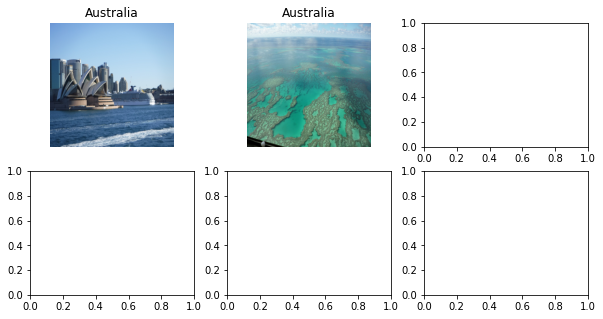

In [ ]:
#正解した画像を表示
flg, axes = plt.subplots(2, 3, figsize=(10, 5))

for i in range(count_correct):
  ax = axes[i // 3][i % 3]
  ax.set_title(label_names[correct_label[i]])
  ax.axis("off")
  ax.imshow(correct_data[i])

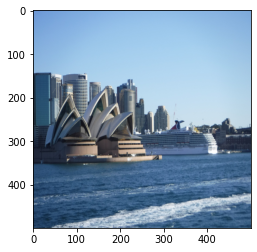

In [ ]:
plt.imshow(correct_data[0])